In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("data/racquet.csv")

In [27]:
df.shape
df

,Racquet,Overall,Groundstrokes,Volleys,Serves,Returns,Power,Control,Maneuverability,Stability,Comfort,TouchFeel,Topspin,Slice,Price
0,Babolat Pure Aero 2023,84,84.0,83.0,84.0,86.0,83.0,80.0,85.0,81.0,82.0,81.0,89.0,82.0,$259.00
1,Babolat Pure Drive Plus,86,87.0,87.0,85.0,85.0,87.0,83.0,82.0,88.0,83.0,82.0,89.0,85.0,$249.00
2,Babolat Pure Drive,87,85.0,83.0,87.0,85.0,92.0,80.0,85.0,85.0,82.0,79.0,83.0,86.0,$249.00
3,Babolat Pure Strike 16x19 3rd Gen,86,88.0,85.0,86.0,87.0,87.0,84.0,88.0,84.0,84.0,86.0,86.0,87.0,$139.00
4,Babolat Pure Strike 18x20 3rd Gen,81,82.0,86.0,84.0,79.0,80.0,86.0,81.0,85.0,81.0,82.0,80.0,85.0,$139.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Yonex VCORE 100+,8.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Order Now
114,Yonex VCORE 95 2023,83,85.0,83.0,83.0,79.0,76.0,84.0,80.0,80.0,90.0,85.0,84.0,80.0,$269.00
115,Yonex VCORE 98 2023,84,85.0,82.0,83.0,84.0,84.0,81.0,79.0,85.0,86.0,81.0,89.0,86.0,$269.00
116,Yonex VCORE 98+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Order Now


### Removing uneccesary coloumns and cleaning up the names

In [28]:
df.columns


Index(['Racquet', 'Overall', 'Groundstrokes', 'Volleys', 'Serves', 'Returns',
       'Power', 'Control', 'Maneuverability', 'Stability', 'Comfort',
       'TouchFeel', 'Topspin', 'Slice', 'Price'],
      dtype='object')

In [29]:
df = df[['Racquet', 'Power', 'Control', 'Maneuverability', 'Stability', 'Comfort','TouchFeel', 'Topspin', 'Slice', 'Price']]
df.shape

(118, 10)

In [30]:
df = df.rename(columns={"TouchFeel": "Touch"})

### Checking and removing duplicates

In [32]:
df.duplicated(["Racquet"]).sum()
df.drop_duplicates(["Racquet"])

,Racquet,Power,Control,Maneuverability,Stability,Comfort,Touch,Topspin,Slice,Price
0,Babolat Pure Aero 2023,83.0,80.0,85.0,81.0,82.0,81.0,89.0,82.0,$259.00
1,Babolat Pure Drive Plus,87.0,83.0,82.0,88.0,83.0,82.0,89.0,85.0,$249.00
2,Babolat Pure Drive,92.0,80.0,85.0,85.0,82.0,79.0,83.0,86.0,$249.00
3,Babolat Pure Strike 16x19 3rd Gen,87.0,84.0,88.0,84.0,84.0,86.0,86.0,87.0,$139.00
4,Babolat Pure Strike 18x20 3rd Gen,80.0,86.0,81.0,85.0,81.0,82.0,80.0,85.0,$139.00
...,...,...,...,...,...,...,...,...,...,...
113,Yonex VCORE 100+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Order Now
114,Yonex VCORE 95 2023,76.0,84.0,80.0,80.0,90.0,85.0,84.0,80.0,$269.00
115,Yonex VCORE 98 2023,84.0,81.0,79.0,85.0,86.0,81.0,89.0,86.0,$269.00
116,Yonex VCORE 98+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Order Now


### Checking for and removing Null Values

In [35]:
df.isna().sum() / df.shape[0] 

Racquet            0.000000
Power              0.262712
Control            0.262712
Maneuverability    0.262712
Stability          0.262712
Comfort            0.262712
Touch              0.262712
Topspin            0.262712
Slice              0.262712
Price              0.042373
dtype: float64

In [45]:
df = df.dropna()
df

,Racquet,Power,Control,Maneuverability,Stability,Comfort,Touch,Topspin,Slice,Price
0,Babolat Pure Aero 2023,83.0,80.0,85.0,81.0,82.0,81.0,89.0,82.0,$259.00
1,Babolat Pure Drive Plus,87.0,83.0,82.0,88.0,83.0,82.0,89.0,85.0,$249.00
2,Babolat Pure Drive,92.0,80.0,85.0,85.0,82.0,79.0,83.0,86.0,$249.00
3,Babolat Pure Strike 16x19 3rd Gen,87.0,84.0,88.0,84.0,84.0,86.0,86.0,87.0,$139.00
4,Babolat Pure Strike 18x20 3rd Gen,80.0,86.0,81.0,85.0,81.0,82.0,80.0,85.0,$139.00
...,...,...,...,...,...,...,...,...,...,...
107,Yonex EZONE 98,81.0,84.0,84.0,81.0,85.0,84.0,83.0,82.0,$269.00
112,Yonex VCORE 100 2023,89.0,81.0,85.0,83.0,85.0,85.0,88.0,84.0,$269.00
114,Yonex VCORE 95 2023,76.0,84.0,80.0,80.0,90.0,85.0,84.0,80.0,$269.00
115,Yonex VCORE 98 2023,84.0,81.0,79.0,85.0,86.0,81.0,89.0,86.0,$269.00


### Plot the data

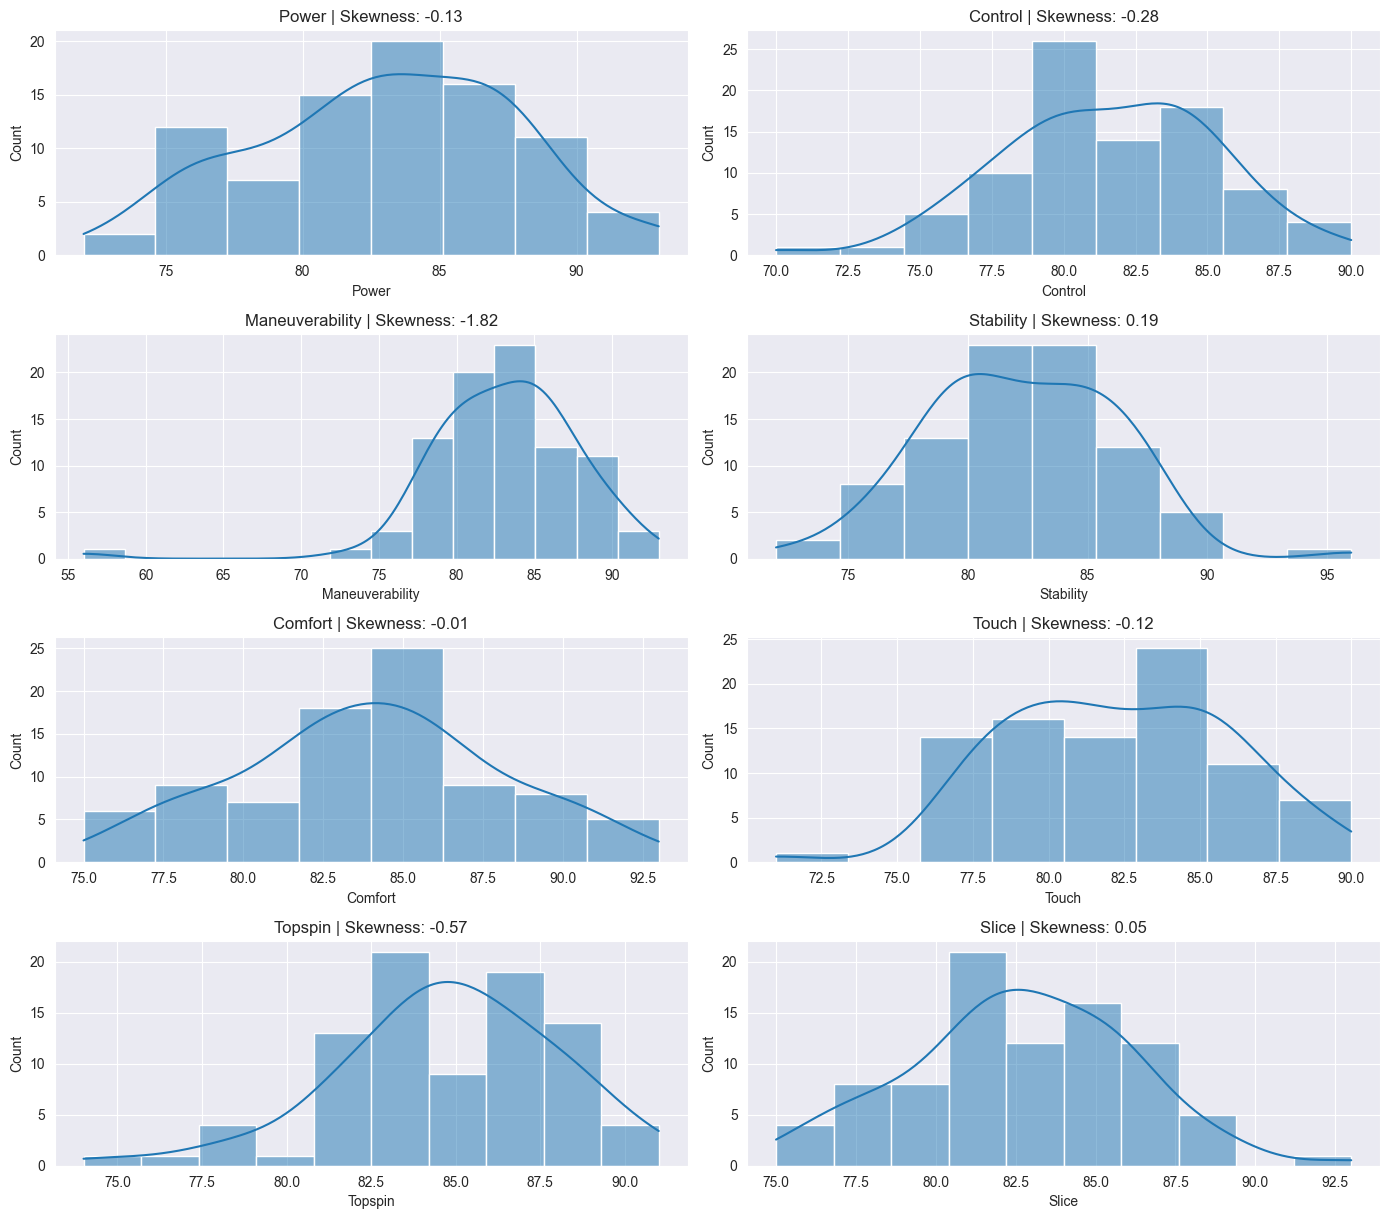

In [46]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes("number").columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
	plt.subplot(len(numerical_columns), 2, idx)
	
	# Kernel density plot
	sns.histplot(df[feature], kde=True)
	plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

### Remove obvious outliers

In [49]:
df.drop(df[df["Maneuverability"] < 70].index)

,Racquet,Power,Control,Maneuverability,Stability,Comfort,Touch,Topspin,Slice,Price
0,Babolat Pure Aero 2023,83.0,80.0,85.0,81.0,82.0,81.0,89.0,82.0,$259.00
1,Babolat Pure Drive Plus,87.0,83.0,82.0,88.0,83.0,82.0,89.0,85.0,$249.00
2,Babolat Pure Drive,92.0,80.0,85.0,85.0,82.0,79.0,83.0,86.0,$249.00
3,Babolat Pure Strike 16x19 3rd Gen,87.0,84.0,88.0,84.0,84.0,86.0,86.0,87.0,$139.00
4,Babolat Pure Strike 18x20 3rd Gen,80.0,86.0,81.0,85.0,81.0,82.0,80.0,85.0,$139.00
...,...,...,...,...,...,...,...,...,...,...
107,Yonex EZONE 98,81.0,84.0,84.0,81.0,85.0,84.0,83.0,82.0,$269.00
112,Yonex VCORE 100 2023,89.0,81.0,85.0,83.0,85.0,85.0,88.0,84.0,$269.00
114,Yonex VCORE 95 2023,76.0,84.0,80.0,80.0,90.0,85.0,84.0,80.0,$269.00
115,Yonex VCORE 98 2023,84.0,81.0,79.0,85.0,86.0,81.0,89.0,86.0,$269.00
